# Análise de Dados

## Importando os pacotes e carregando o csv em um dataframe

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Carregar os dados em um DataFrame
df = pd.read_csv("airline_dataset_updated_v2.csv")

## Visualizando os dados

In [11]:
df.head(10)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time
5,nMJKVh,Lora,Durbann,Female,55,Brazil,Coronel Horácio de Mattos Airport,BR,Brazil,SAM,South America,06-10-2022,LEC,Inglis Dolley,On Time
6,8IPFPE,Rand,Bram,Male,73,Ivory Coast,Duxford Aerodrome,GB,United Kingdom,EU,Europe,10/30/2022,QFO,Stanislas Tiffin,Cancelled
7,pqixbY,Perceval,Dallosso,Male,36,Vietnam,Maestro Wilson Fonseca Airport,BR,Brazil,SAM,South America,04-07-2022,STM,Sharyl Eastmead,Cancelled
8,QNAs2R,Aleda,Pigram,Female,35,Palestinian Territory,Venice Marco Polo Airport,IT,Italy,EU,Europe,8/20/2022,VCE,Daryn Bardsley,On Time
9,3jmudz,Burlie,Schustl,Male,13,Thailand,Vermilion Airport,CA,Canada,NAM,North America,04-06-2022,YVG,Alameda Carlyle,On Time


In [12]:
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

Passenger ID            98619
First Name               8437
Last Name               41658
Gender                      2
Age                        90
Nationality               240
Airport Name             9062
Airport Country Code      235
Country Name              235
Airport Continent           6
Continents                  6
Departure Date            364
Arrival Airport          9024
Pilot Name              98605
Flight Status               3
dtype: int64

## Preparando os dados

In [13]:
#Calculando o número total de valores ausentes no dataframe para verificar a integridade dos dados
df.isnull().sum().sum()

0

In [14]:
#Definindo o gênero como categoria e verificando os valores únicos
df['Gender'] = df['Gender'].astype('category')
df['Gender'].unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [15]:
#definindo idade como inteiro
df['Age'] = df['Age'].astype(int)

## Criando gráficos para a visualização e análise dos dados

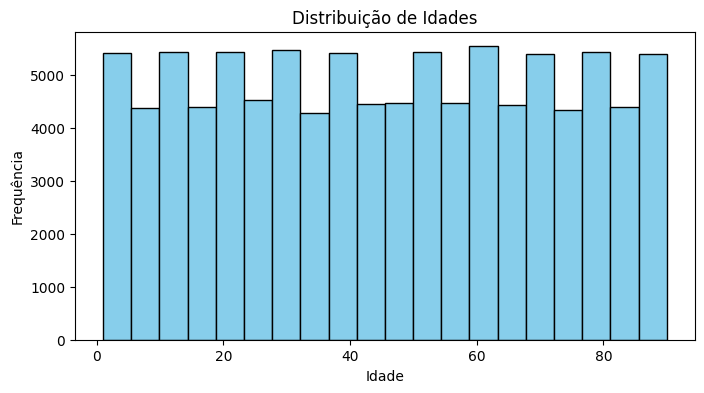

In [16]:
# Histograma da idade
plt.figure(figsize=(8, 4))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

In [17]:
# Gráfico de barras para status do voo
 df['Flight Status'].value_counts()
ax = status_counts.plot(kind='bar', color='lightgreen')
plt.title('Status dos Voos')
plt.xlabel('Status')
plt.ylabel('Quantidade')
# Adicionar os valores absolutos acima das barras
for i, v in enumerate(status_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

IndentationError: unexpected indent (2002998103.py, line 2)

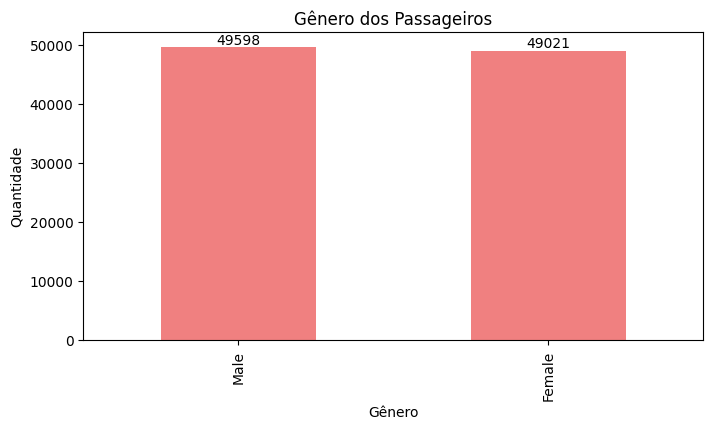

In [18]:
# Gráfico de barras para gênero
plt.figure(figsize=(8, 4))
gender_counts = df['Gender'].value_counts()
ax = gender_counts.plot(kind='bar', color='lightcoral')
plt.title('Gênero dos Passageiros')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
# Adicionar os valores absolutos acima das barras
for i, v in enumerate(gender_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

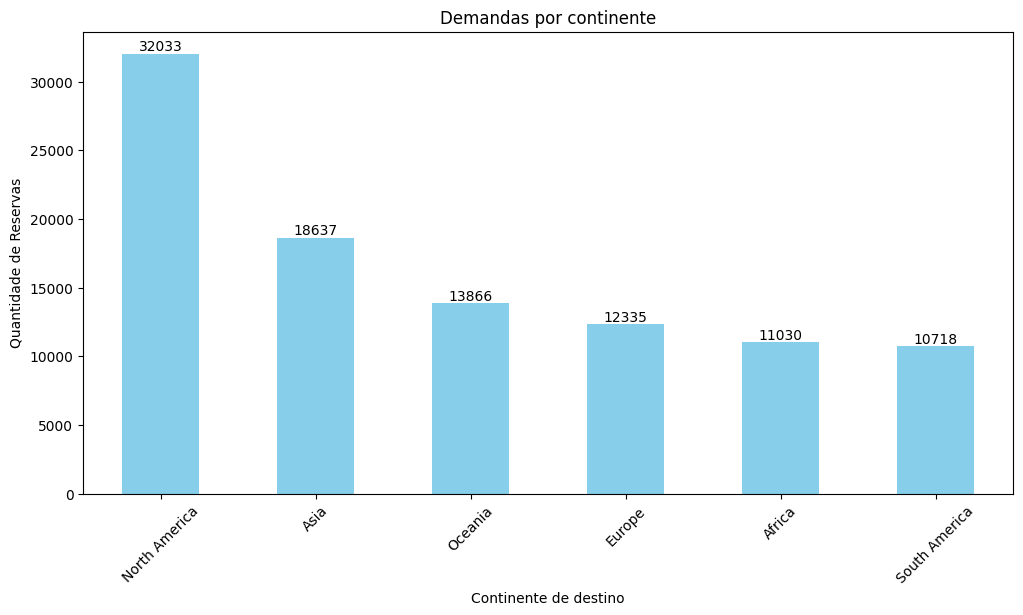

In [19]:
#Gráfico de barras para continentes
continentes = df['Continents'].value_counts()
plt.figure(figsize=(12, 6))
ax = continentes.plot(kind='bar', color='skyblue')
plt.title('Demandas por continente')
plt.xlabel('Continente de destino')
plt.ylabel('Quantidade de Reservas')
plt.xticks(rotation=45)
# Adicionar os valores absolutos acima das barras
for i, v in enumerate(continentes):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

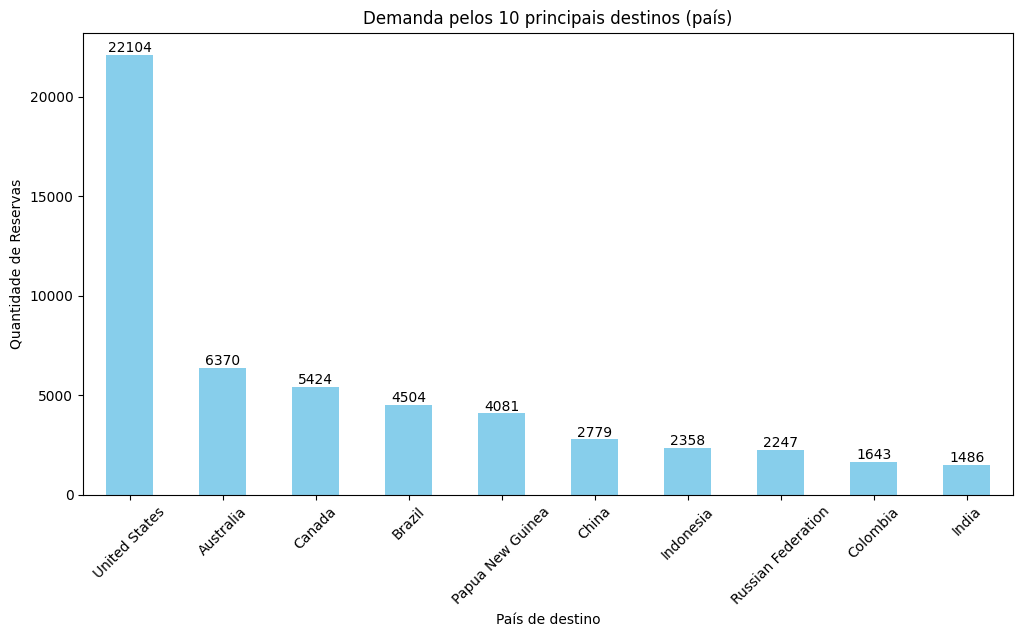

In [20]:
#Gráfico de barras para os principais países de destino
top10_airport_country = df['Country Name'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
ax = top10_airport_country.plot(kind='bar', color='skyblue')
plt.title('Demanda pelos 10 principais destinos (país)')
plt.xlabel('País de destino')
plt.ylabel('Quantidade de Reservas')
plt.xticks(rotation=45)
# Adicionar os valores absolutos acima das barras
for i, v in enumerate(top10_airport_country):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

## Dividir dados em conjuntos de treinamento e teste

In [21]:
# Codificar a variável categórica 'Country Name'
le = LabelEncoder()
df['Country Name'] = le.fit_transform(df['Country Name'])

# Calcular a contagem de passageiros com base no número de registros para cada país de destino
passenger_count = df['Country Name'].value_counts().reset_index()
passenger_count.columns = ['Country Name', 'Passenger Count']

# Juntar os resultados ao DataFrame original
df = df.merge(passenger_count, on='Country Name')

# Definir o país de destino como variável independente (X) e o número de passageiros como variável dependente (y)
X = df[['Country Name']]
y = df['Passenger Count']

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Criar e treinar um modelo de regressão linear

In [22]:
# Criar e treinar um modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Fazer previsões para o número de passageiros com base no país de destino
predictions = model.predict(X_test)

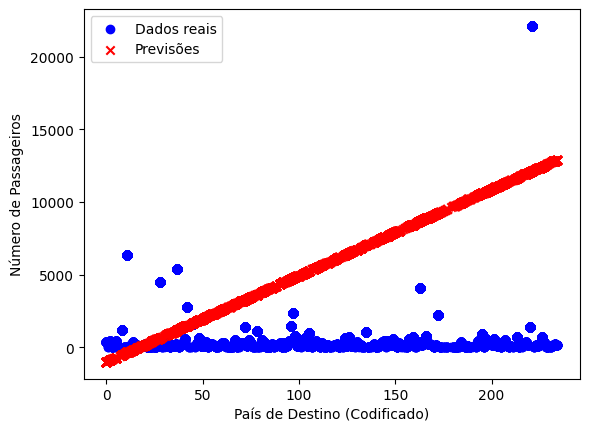

In [24]:
# Visualizar as previsões e os dados reais
plt.scatter(X_test, y_test, label='Dados reais', color='blue')
plt.scatter(X_test, predictions, label='Previsões', color='red', marker='x')
plt.xlabel('País de Destino (Codificado)')
plt.ylabel('Número de Passageiros')
plt.legend()
plt.show()

## Aplicando medidas de acurácia

In [25]:
from sklearn import metrics

In [26]:
# Calculo do R²

r2 = metrics.r2_score(y_test, predictions)
print(f"Coeficiente de Determinação (R2): {r2}")

# O modelo apresentado conseguiu capturar 29% da variança dos dados 
# Atenção: Nosso R² ficou bem abaixo e é um coeficiente bem importante

Coeficiente de Determinação (R2): 0.2997071061216683


In [27]:
# Calculo do Erro Absoluto Médio

mae = metrics.mean_absolute_error(y_test, predictions)
print(f"Erro Absoluto Médio (MAE): {mae}")



Erro Absoluto Médio (MAE): 6300.591574279943


In [ ]:
# Avaliar a qualidade do modelo (opcional)
from sklearn.metrics import mean_squared_errorr2
mse = mean_squared_error(y_test, predictions)
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')

Erro Quadrático Médio (MSE): 51689893.02


## Segmentação de clientes

In [ ]:
from sklearn.cluster import KMeans

# Codificar variáveis categóricas
label_encoder = LabelEncoder()
# Codificar todas as variáveis categóricas
categorical_columns = ['Gender', 'Nationality', 'Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Continents', 'Arrival Airport', 'Pilot Name', 'Flight Status']

for column in categorical_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])

# Usar apenas as variáveis relevantes para a segmentação (Age, Gender, Nationality)
X_segmentation = df[['Age', 'Gender', 'Nationality']]

# Escolher o número de clusters (grupos) desejado
num_clusters = 3

# Aplicar o algoritmo de K-means para segmentação
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Segment'] = kmeans.fit_predict(X_segmentation)

# Analisar os segmentos resultantes
segment_counts = df['Segment'].value_counts()
print(segment_counts)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    38101
1    34948
2    25570
Name: Segment, dtype: int64


# # Eficiência das Operações com base no Status do Voo

In [ ]:
# Calcular métricas de desempenho para diferentes países
country_performance = df.groupby('Country Name')['Flight Status'].value_counts().unstack(fill_value=0)

# Exibir métricas para atrasos, cancelamentos, etc., por país
print(country_performance)


Flight Status    0    1    2
Country Name                
0              137  121  114
1                5    5    2
2              151  151  147
3               21   10   14
4                4    1    2
...            ...  ...  ...
230              4    8    5
231             12   12   15
232             63   63   60
233             68   89   65
234             40   56   52

[235 rows x 3 columns]


## Previsão de tendências de Viagem

In [ ]:
# Calcular a contagem de passageiros por país de destino
passenger_counts = df.groupby('Country Name')['Passenger ID'].count().reset_index(name='Passenger Count')

# Definir o país de destino como variável independente (X) e o número de passageiros como variável dependente (y)
X = passenger_counts[['Country Name']]
y = passenger_counts['Passenger Count']

# Codificar a variável categórica 'Country Name'
X = pd.get_dummies(X, columns=['Country Name'], drop_first=True)

# Dividir os dados em treinamento e teste (opcional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar um modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Fazer previsões para o número de passageiros por país
predictions = model.predict(X)



In [ ]:
# Calcular o erro quadrático médio (MSE) das previsões
mse = mean_squared_error(y, predictions)
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')

# Visualizar as previsões e os dados reais
plt.figure(figsize=(12, 6))
print(X)
print(y)


Erro Quadrático Médio (MSE): 0.00
     Country Name_1  Country Name_2  Country Name_3  Country Name_4  \
0                 0               0               0               0   
1                 1               0               0               0   
2                 0               1               0               0   
3                 0               0               1               0   
4                 0               0               0               1   
..              ...             ...             ...             ...   
230               0               0               0               0   
231               0               0               0               0   
232               0               0               0               0   
233               0               0               0               0   
234               0               0               0               0   

     Country Name_5  Country Name_6  Country Name_7  Country Name_8  \
0                 0               0       

<Figure size 1200x600 with 0 Axes>